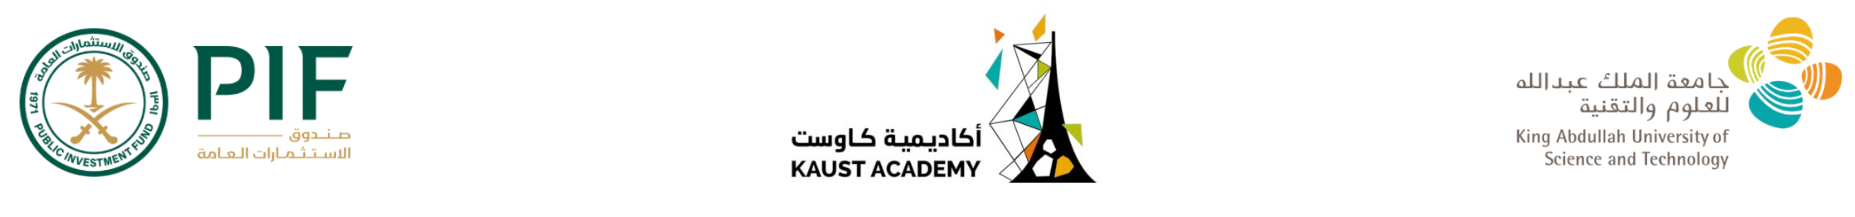

# Logistic Regression on the Iris Dataset

In this notebook, we will:
- Load the Iris dataset from scikit-learn
- Split data into training and testing sets
- Train a Logistic Regression classifier
- Evaluate performance using accuracy and a classification report
- Visualize the confusion matrix


In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt


## 1) Load Iris dataset

The Iris dataset contains:
- 150 samples
- 4 numeric features (sepal length/width, petal length/width)
- 3 classes (setosa, versicolor, virginica)


In [ ]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

target_names = iris.target_names

X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2) Quick check

We will inspect:
- Feature shape
- Class distribution
- Missing values


In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

print("\nClass counts:")
print(y.value_counts().sort_index().rename(index=dict(enumerate(target_names))))

print("\nMissing values in X:")
print(X.isna().sum())

X shape: (150, 4)
y shape: (150,)

Class counts:
target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Missing values in X:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


## 3) Split into training and testing sets

We use:
- 80% training
- 20% testing
- stratify=y to keep class balance
- random_state for reproducibility


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 120
Test size: 30


## 4) Build a model pipeline

We will use a Pipeline:
1. StandardScaler (feature scaling)
2. LogisticRegression (multiclass classification)

Why scaling?
- Logistic Regression often performs better when features are on similar scales.


In [ ]:
model = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=1000,
        multi_class="auto",
        random_state=42
    ))
])

model


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(max_iter=1000, multi_class='auto',
                                    random_state=42))])

## 5) Train (fit) the model


In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(max_iter=1000, multi_class='auto',
                                    random_state=42))])

## 6) Make predictions on the test set


In [ ]:
y_pred = model.predict(X_test)

y_pred[:10]


array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1])

## 7) Evaluate the model

We will report:
- Accuracy
- Classification report (precision, recall, F1-score per class)


In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## 8) Confusion Matrix

A confusion matrix shows:
- True labels (rows)
- Predicted labels (columns)


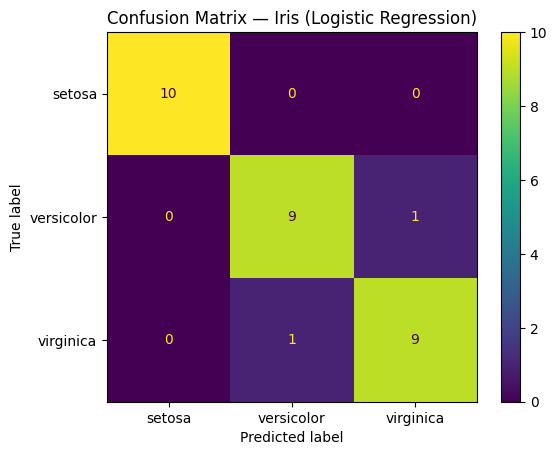

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(values_format="d")
plt.title("Confusion Matrix — Iris (Logistic Regression)")
plt.show()


## 9) Predict a new flower

We can input a new sample with 4 features:
- sepal length, sepal width, petal length, petal width


In [ ]:
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])

pred_class = model.predict(new_sample)[0]
pred_name = target_names[pred_class]

proba = model.predict_proba(new_sample)[0]

print("Predicted class:", pred_name)
print("Probabilities:", dict(zip(target_names, np.round(proba, 4))))


Predicted class: setosa
Probabilities: {np.str_('setosa'): np.float64(0.9808), np.str_('versicolor'): np.float64(0.0192), np.str_('virginica'): np.float64(0.0)}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Exercise: Predict High Congestion (KSA Traffic Index)

You will download a real dataset via KaggleHub and build a model to predict **High Congestion**.

You will practice:
- Loading data from KaggleHub
- Cleaning missing values
- Fixing column names
- Feature engineering from datetime (hour, day of week)
- One-hot encoding city
- Pipeline: preprocessing + Logistic Regression
- Evaluation with accuracy + confusion matrix

Target (binary):
- `high_congestion = 1` if `traffic_index` is high (you will define the threshold)


In [9]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt


In [19]:
dataset_dir = kagglehub.dataset_download(
    "majedalhulayel/traffic-index-in-saudi-arabia-and-middle-east"
)

print("Dataset downloaded to:", dataset_dir)

csv_files = glob.glob(os.path.join(dataset_dir, "**", "*.csv"), recursive=True)
csv_files


Using Colab cache for faster access to the 'traffic-index-in-saudi-arabia-and-middle-east' dataset.
Dataset downloaded to: /kaggle/input/traffic-index-in-saudi-arabia-and-middle-east


['/kaggle/input/traffic-index-in-saudi-arabia-and-middle-east/traffic_index.csv']

In [20]:
csv_path = csv_files[0]
df = pd.read_csv(csv_path)

df.head()


,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [10]:
threshold = df["trafficindexlive"].quantile(0.75)

df["high_congestion"] = (df["trafficindexlive"] >= threshold).astype(int)

df["high_congestion"].value_counts()


,count
high_congestion,
0,49027
1,17612


## Your Tasks (TODO)

### TODO 1 — Inspect the dataset
- Print `df.shape`, `df.info()`
- Show missing values per column
- Print the first 10 column names

In [11]:
print("Shape:", df.shape)
df.info()

print("\nMissing values:")
print(df.isna().sum().sort_values(ascending=False))


Shape: (66639, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   city                 66639 non-null  object        
 1   datetime             66639 non-null  datetime64[ns]
 2   trafficindexlive     66639 non-null  int64         
 3   jamscount            66639 non-null  int64         
 4   jamsdelay            66639 non-null  float64       
 5   jamslength           66639 non-null  float64       
 6   trafficindexweekago  66639 non-null  int64         
 7   traveltimehistoric   66639 non-null  float64       
 8   traveltimelive       66639 non-null  float64       
 9   hour                 66639 non-null  int32         
 10  dayofweek            66639 non-null  int32         
 11  is_weekend           66639 non-null  int64         
 12  high_congestion      66639 non-null  int64         
dtypes: datetime6


### TODO 2 — Standardize column names
- Convert to lowercase
- Replace spaces with underscores
- Remove special characters if needed

In [12]:
df.columns = (
    df.columns
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("(", "", regex=False)
      .str.replace(")", "", regex=False)
)

df.columns


Index(['city', 'datetime', 'trafficindexlive', 'jamscount', 'jamsdelay',
       'jamslength', 'trafficindexweekago', 'traveltimehistoric',
       'traveltimelive', 'hour', 'dayofweek', 'is_weekend', 'high_congestion'],
      dtype='object')

In [13]:
features = [
    "city",
    "hour",
    "dayofweek",
    "is_weekend",
    "jamscount",
    "jamsdelay",
    "jamslength",
    "trafficindexweekago",
    "traveltimelive"
]

X = df[features]
y = df["high_congestion"]

X.head()


,city,hour,dayofweek,is_weekend,jamscount,jamsdelay,jamslength,trafficindexweekago,traveltimelive
0,Abudhabi,8,4,1,4,15.6,0.7,13,54.803617
1,Abudhabi,9,4,1,7,20.5,1.7,8,56.118629
2,Abudhabi,10,4,1,8,25.0,2.8,6,55.518834
3,Abudhabi,11,4,1,11,30.6,5.5,6,56.413917
4,Abudhabi,12,4,1,20,62.1,6.5,5,56.059246




### TODO 4 — Handle missing values
- Numeric columns: fill with median
- Categorical columns (e.g., city): fill with mode

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((53311, 9), (13328, 9))



### TODO 5 — Create the target `high_congestion`
- Use `traffic_index` (or the closest traffic metric)
- Define:
  - `high_congestion = 1` if traffic_index >= threshold
- Use a meaningful threshold:
  - e.g., the 75th percentile (Q3)

In [15]:
categorical_features = ["city"]
numeric_features = [c for c in X.columns if c not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

model


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city']),
                                                 ('num', StandardScaler(),
                                                  ['hour', 'dayofweek',
                                                   'is_weekend', 'jamscount',
                                                   'jamsdelay', 'jamslength',
                                                   'trafficindexweekago',
                                                   'traveltimelive'])])),
                ('classifier', LogisticRegression(max_iter=1000))])



### TODO 6 — Build X and y
- Choose features:
  - city, hour, dayofweek, jams_count, jams_length (if available), etc.
- `y = high_congestion`

In [16]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city']),
                                                 ('num', StandardScaler(),
                                                  ['hour', 'dayofweek',
                                                   'is_weekend', 'jamscount',
                                                   'jamsdelay', 'jamslength',
                                                   'trafficindexweekago',
                                                   'traveltimelive'])])),
                ('classifier', LogisticRegression(max_iter=1000))])



### TODO 7 — Train/test split
- 80/20 split
- random_state=42
- stratify=y

### TODO 8 — Pipeline try differnt models (Trees, SVM)
- OneHotEncode categorical features (city)
- Scale numeric features
- Train Logistic Regression



In [17]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9675120048019208

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      9806
           1       0.95      0.93      0.94      3522

    accuracy                           0.97     13328
   macro avg       0.96      0.95      0.96     13328
weighted avg       0.97      0.97      0.97     13328



### TODO 9 — Evaluate
- Accuracy
- Classification report
- Confusion matrix


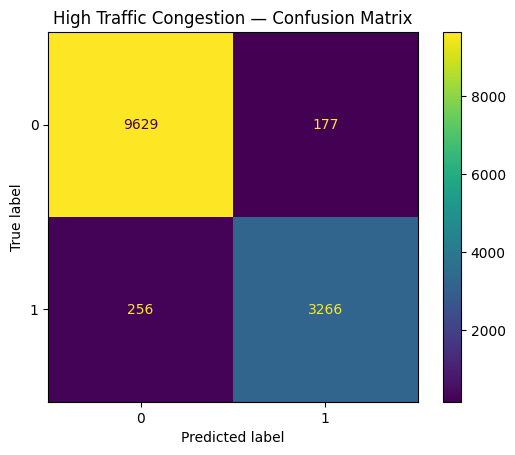

In [18]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot(values_format="d")
plt.title("High Traffic Congestion — Confusion Matrix")
plt.show()
